In this tuturial we will use a dataset of mosquito wingbeat recordings which have been obtained from this [kaggle](www.kaggle.com) dataset [Wingbeats](https://www.kaggle.com/potamitis/wingbeats/data).

The data collection process is described in the following paper:

[ Ilyas Potamitis and Iraklis Rigakis, ''Large Aperture Optoelectronic Devices to Record and Time-Stamp Insects’ Wingbeats''](http://ieeexplore.ieee.org/abstract/document/7482663/)

This notebook uses a few packages which do not come with a standard Anaconda installation. But can be easily installed directly from the notebook. If need run the next cell.

In [1]:
! pip install soundfile
! conda install --yes -c conda-forge librosa
! conda install --yes seaborn

You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.4.9
  latest version: 4.5.2

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /Users/valentina/anaconda/envs/wingbeats

  added / updated specs: 
    - librosa


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2018.4.16          |           py36_0         142 KB  conda-forge

The following packages will be UPDATED:

    ca-certificates: 2018.03.07-0      --> 2018.4.16-0      conda-forge
    certifi:         2018.4.16-py36_0  --> 2018.4.16-py36_0 conda-forge
    openssl:         1.0.2o-h26aff7b_0 --> 1.0.2o-0         conda-forge


certifi 2018.4.16: ##############################

In [2]:
# First we will import many packages that we will need

from sklearn.utils import shuffle
import librosa
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

import os
import soundfile as sf
from scipy import signal
import seaborn as sn

The dataset contains 279,566 recordings, but we will use only subset of them to make the computation and storage simpler. The first step is to download the `Wingbeats.zip` from the kaggle link and unzip it locally in the folder called data. Next we will use the following function to read the recordings into python.

In [10]:
# the following function reads recording from the Wingbeats Database
def get_data(target_names):

	# Read a subset of recs from every species
	# Note: All wav files must be the same sampling frequency and number of datapoints!

	X = []                    # holds all data
	y = []                    # holds all class labels

	filenames = []            # holds all the file names
	target_count = []         # holds the counts in a class

	for i, target in enumerate(target_names):
	    target_count.append(0)  # initialize target count
	    path=os.path.join('data','Wingbeats',target)    # assemble path string

	    for [root, dirs, files] in os.walk(path, topdown=False):
	        for filename in files:
	            name,ext = os.path.splitext(filename)
	            if ext=='.wav':
	                name=os.path.join(root, filename)
	                data, fs = sf.read(name)
	                X.append(data)
	                y.append(i)
	                filenames.append(name)
	                target_count[i]+=1
	                if target_count[i]>400:
	                	break
	    print (target,'#recs = ', target_count[i])

	X = np.vstack(X)
	y = np.hstack(y)

	X = X.astype("float32")
	print ("")
	print ("Total dataset size:")
	print ('# of classes: %d' % len(np.unique(y)))
	print ('total dataset size: %d' % X.shape[0])
	print ('Sampling frequency = %d Hz' % fs)
	print ("n_samples: %d" % X.shape[1])
	print ("duration (sec): %f" % (X.shape[1]/fs))

	return X, y

In [11]:
target_names = ['Ae. aegypti', 'Ae. albopictus', 'An. gambiae', 'An. arabiensis', 'C. pipiens', 'C. quinquefasciatus']

X, y = get_data(target_names)

# We will reshuffle the data to avoid the ordering effect
X, y = shuffle(X,y, random_state=2018)
print('\nThe size of X is %s, where %d indicates the number of recordings and %d is the length of each recording.' % (str(X.shape),X.shape[0],X.shape[1]))

Ae. aegypti #recs =  1258
Ae. albopictus #recs =  599
An. gambiae #recs =  891
An. arabiensis #recs =  590
C. pipiens #recs =  701
C. quinquefasciatus #recs =  1142

Total dataset size:
# of classes: 6
total dataset size: 5181
Sampling frequency = 8000 Hz
n_samples: 5000
duration (sec): 0.625000

The size of X is (5181, 5000), where 5181 indicates the number of recordings and 5000 is the length of each recording.


The data in this format is very useful for many functions in `scikit-learn`, so we will store $X$ and $y$ so that we can directly use these variables in the next notebooks.

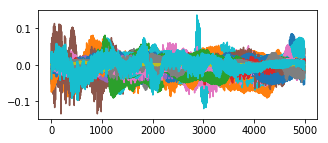

In [12]:
# look at first 100 recordings 
plt.figure(figsize = (5,2))
plt.plot(X[:100,:].T)
plt.draw()

In [9]:
# storing the data
np.save(os.path.join('data','X.npy'),X)
np.save(os.path.join('data','y.npy'),y)